# SbatchMan Hands-on Tutorial

> Ensure that Jupiter is using the same venv you set up before.

### First, on your local machine

Let's check if SbatchMan Python API and CLI are properly installed.

In [7]:
# SbatchMan CLI
! sbatchman --version # This is running in your shell

SbatchMan version: 0.8.2


In [8]:
# SbatchMan Python API
import sbatchman as sbm
print(f'SbatchMan version: {sbm.__version__}')

SbatchMan version: 0.8.2


### Let's give a name to our machine

In [4]:
! sbatchman set-cluster-name local
# You can replace `local` with another name of your choice

✓ Cluster name changed to 'local'.


Let's see if this worked.

In [ ]:
sbm.get_cluster_name()

'local'

### Be Lazy (optional)

Setup aliases for SbatchMan CLI commands. Checkout [https://sbatchman.readthedocs.io/en/latest/learn/aliases](https://sbatchman.readthedocs.io/en/latest/learn/aliases).

> *Note:* this may not work if you run shell commands from Jupiter :( 

## Let's begin with a simple example on your local machine

First, create a SbatchMan Project in the current directory.

This will create a folder for SbatchMan files and jobs results.

In [11]:
! sbatchman init

✓ SbatchMan project initialized successfully in 
/home/thomas/uni/PhD/SbatchManTutorial/SbatchMan


For these examples, we will consider the following files.
Programs:
- [programs/intro/hello_world.py](programs/intro/hello_world.py)
- [programs/intro/fail.py](programs/intro/fail.py)
- [programs/intro/timeout.py](programs/intro/timeout.py)

Configuration YAML file:
- [yaml_files/configs/intro.yaml](yaml_files/configs/intro.yaml)

Jobs YAML files:
- [yaml_files/jobs/intro_hello_world.yaml](yaml_files/jobs/intro_hello_world.yaml)
- [yaml_files/jobs/intro.yaml](yaml_files/jobs/intro.yaml)

Check them out!

For more info check the documentation:  
[https://sbatchman.readthedocs.io/en/latest/learn/configuration/](https://sbatchman.readthedocs.io/en/latest/learn/configuration)  
[https://sbatchman.readthedocs.io/en/latest/learn/launching_jobs/](https://sbatchman.readthedocs.io/en/latest/learn/launching_jobs)

### 1) Create SbatchMan configurations

In [ ]:
! sbatchman configure -f yaml_files/configs/intro.yaml
# This basically generates wrappers for your job commands 
# For lazy people `sbmc`

Error: Configuration 'simple_local_config' for cluster 'local' already exists. 
Use '--overwrite' to update it.


### 2) Launch HelloWorld jobs

In [ ]:
! sbatchman launch -f yaml_files/jobs/intro_hello_world.yaml
# For lazy people `sbml`

✅ Submitting job with command 'python3 programs/intro/hello_world.py'.
✅ Submitting job with command 'python3 programs/intro/hello_world.py'.
✅ Submitted successfully 2 jobs.


**Relative paths in the YAML are relative to the directory where the sbatchman command is run.**

### 3) Check results

In you shell, from this repo root folder, run:

```bash
sbatchman status
# For lazy people `sbms`
```

### 4) Archive jobs

Keep jobs results but you won't see them in the status TUI.

In [ ]:
! sbatchman archive hello_world_archived
# `hello_world_archived` is the name of the "archive"
# For lazy people `sbma`

No jobs to archive


### 5) Launch more interesting jobs

In [18]:
! sbatchman launch -f yaml_files/jobs/intro.yaml
# For lazy people `sbml`

✅ Submitting job with command 'python3 programs/intro/hello_world.py'.
✅ Submitting job with command 'python3 programs/intro/fail.py'.
✅ Submitting job with command 'python3 programs/intro/timeout.py'.
✅ Submitted successfully 3 jobs.


Check results with `sbatchman status`

### Let's move on to more interesting examples

Run the following command to **permanently** delete all jobs (archives as well).

In [6]:
! sbatchman delete-jobs --all
# For lazy people `sbmdj`

✅ Successfully deleted 51 jobs.


## Approximating $\pi$

For these examples, we will consider the following files.
Program:
- [programs/pi/compute_pi.c](programs/pi/compute_pi.c)

Configuration YAML file:
- [yaml_files/configs/pi.yaml](yaml_files/configs/pi.yaml)

Jobs YAML file:
- [yaml_files/jobs/pi.yaml](yaml_files/jobs/intro.yaml)

Check them out!

### 1) Compile

In [7]:
! make -C programs/pi all

make: Entering directory '/home/thomas/uni/PhD/SbatchManTutorial/programs/pi'
gcc -O3 -fopenmp -DTYPE_FLOAT -o compute_pi_float compute_pi.c
gcc -O3 -fopenmp -DTYPE_DOUBLE -o compute_pi_double compute_pi.c
gcc -O3 -fopenmp -DTYPE_FLOAT16 -o compute_pi_float16 compute_pi.c
make: Leaving directory '/home/thomas/uni/PhD/SbatchManTutorial/programs/pi'


### 2) Create configurations

In [1]:
! sbatchman configure -f yaml_files/configs/pi.yaml

✅ Configuration '1_threads' saved to 
/home/thomas/uni/PhD/SbatchManTutorial/SbatchMan/configs/local/1_threads.sh
✅ Configuration '2_threads' saved to 
/home/thomas/uni/PhD/SbatchManTutorial/SbatchMan/configs/local/2_threads.sh
✅ Configuration '4_threads' saved to 
/home/thomas/uni/PhD/SbatchManTutorial/SbatchMan/configs/local/4_threads.sh
✅ Configuration '8_threads' saved to 
/home/thomas/uni/PhD/SbatchManTutorial/SbatchMan/configs/local/8_threads.sh
✅ Configurations from 'pi.yaml' loaded successfully.


### 3) Launch jobs

In [8]:
! sbatchman launch -f yaml_files/jobs/pi.yaml

✅ Submitting job with command 'programs/pi/compute_pi_float 100'.
✅ Submitting job with command 'programs/pi/compute_pi_float 100000'.
✅ Submitting job with command 'programs/pi/compute_pi_float 10000000'.
✅ Submitting job with command 'programs/pi/compute_pi_float 100000000'.
✅ Submitting job with command 'programs/pi/compute_pi_float 100'.
✅ Submitting job with command 'programs/pi/compute_pi_float 100000'.
✅ Submitting job with command 'programs/pi/compute_pi_float 10000000'.
✅ Submitting job with command 'programs/pi/compute_pi_float 100000000'.
✅ Submitting job with command 'programs/pi/compute_pi_float 100'.
✅ Submitting job with command 'programs/pi/compute_pi_float 100000'.
✅ Submitting job with command 'programs/pi/compute_pi_float 10000000'.
✅ Submitting job with command 'programs/pi/compute_pi_float 100000000'.
✅ Submitting job with command 'programs/pi/compute_pi_float 100'.
✅ Submitting job with command 'programs/pi/compute_pi_float 100000'.
✅ Submitting job with command '

You can alway check jobs progress and results manually using `sbatchman status`

### 4) Gather and Parse results

Example of Job class features

In [ ]:
# This is an example of Job from SbatchMan API
from pprint import pprint
import sbatchman as sbm

job = sbm.jobs_list(status=[sbm.Status.COMPLETED])[0]
pprint(job)
print('\nStd out:')
print(job.get_stdout())
print('\nStd err:')
print(job.get_stderr())
command, pos_args, named_args = job.parse_command_args()
print('\nCommand:' + command)
print('Positional args:')
print(pos_args)
print('Named args:')
print(named_args)

Job(config_name='8_threads',
    cluster_name='local',
    timestamp='20250819_185713',
    exp_dir='local/8_threads/float_100000/20250819_185713',
    command='programs/pi/compute_pi_float 100000',
    status='COMPLETED',
    scheduler='local',
    tag='float_100000',
    job_id=16963,
    exitcode=0,
    preprocess=None,
    postprocess=None,
    archive_name=None)

Std out:
Pi (float) = 3.144119978 (N=100000)
Runtime = 0.0004 seconds


Std err:


Command:programs/pi/compute_pi_float
Positional args:
['100000']
Named args:
{}


In [11]:
import re
import pandas as pd
import sbatchman as sbm

def jobs_to_dataframe(jobs):
    rows = []
    for job in jobs:
        # Threads from config_name like "8_threads"
        m = re.match(r"(\d+)_threads", job.config_name)
        threads = int(m.group(1)) if m else None

        # dtype and samples from tag like "float_100000"
        dtype, samples = None, None
        if job.tag and "_" in job.tag:
            parts = job.tag.split("_")
            if len(parts) == 2:
                dtype, samples = parts[0], int(parts[1])

        # Parse stdout
        stdout = job.get_stdout()
        pi_approx, runtime = None, None

        m = re.search(r"Pi\s*\(\w+\)\s*=\s*([0-9.]+)", stdout)
        if m: pi_approx = float(m.group(1))

        m = re.search(r"Runtime\s*=\s*([0-9.]+)\s*seconds", stdout)
        if m: runtime = float(m.group(1))

        rows.append({
            "threads": threads,
            "dtype": dtype,
            "samples": samples,
            "pi_approx": pi_approx,
            "runtime": runtime,
            "job_id": job.job_id,
            "status": job.status,
        })
    
    return pd.DataFrame(rows)

df = jobs_to_dataframe(sbm.jobs_list(status=[sbm.Status.COMPLETED]))
df.sort_values(['dtype', 'threads'], inplace=True)

# Save for portability
df.to_csv('pi_results.csv', index=False)

print(df)

    threads    dtype    samples  pi_approx  runtime  job_id     status
17        1   double     100000   3.145400   0.0010   17014  COMPLETED
20        1   double        100   3.360000   0.0000   17007  COMPLETED
21        1   double  100000000   3.141568   0.6998   17039  COMPLETED
22        1   double   10000000   3.140922   0.0757   17032  COMPLETED
29        2   double     100000   3.144320   0.0006   17064  COMPLETED
32        2   double        100   3.160000   0.0002   17056  COMPLETED
33        2   double  100000000   3.141598   0.3511   17080  COMPLETED
34        2   double   10000000   3.141148   0.0398   17072  COMPLETED
41        4   double     100000   3.138880   0.0006   17098  COMPLETED
44        4   double        100   3.080000   0.0002   17088  COMPLETED
45        4   double  100000000   3.141545   0.1727   17118  COMPLETED
46        4   double   10000000   3.141472   0.0580   17108  COMPLETED
5         8   double     100000   3.144120   0.0006   17142  COMPLETED
8     

### 5) Generate plots

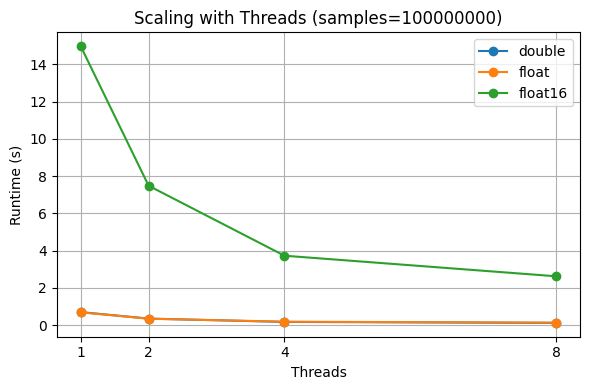

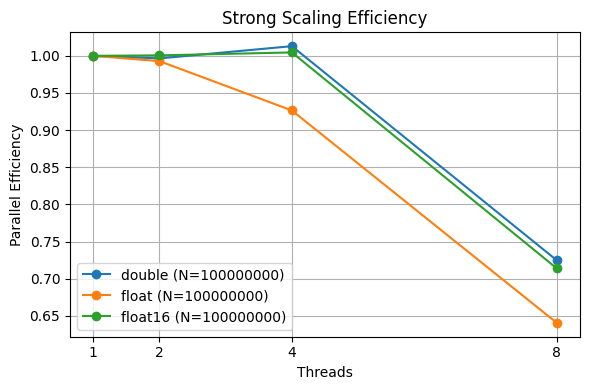

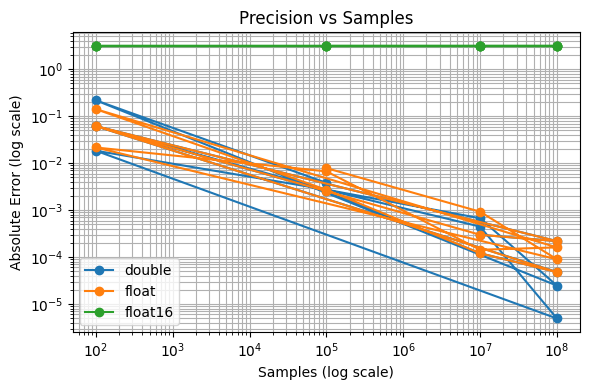

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scaling_and_precision(df):
    true_pi = np.pi

    # Compute error
    df = df.copy()
    df["abs_error"] = (df["pi_approx"] - true_pi).abs()

    # --- Scaling plot: Runtime vs Threads (fixed samples, one per dtype) ---
    plt.figure(figsize=(6,4))
    for dtype, group in df.groupby("dtype"):
        # pick the largest samples to emphasize scaling
        subset = group[group["samples"] == group["samples"].max()]
        plt.plot(subset["threads"], subset["runtime"], marker="o", label=dtype)
    plt.xticks(sorted(df['threads'].unique()))
    plt.xlabel("Threads")
    plt.ylabel("Runtime (s)")
    plt.title(f"Scaling with Threads (samples={df['samples'].max()})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Strong scaling efficiency (optional) ---
    plt.figure(figsize=(6,4))
    for dtype, group in df.groupby("dtype"):
        # pick a fixed samples value
        samples_val = group["samples"].max()
        subset = group[group["samples"] == samples_val].sort_values("threads")
        T1 = subset.loc[subset["threads"]==subset["threads"].min(),"runtime"].values[0]
        speedup = T1 / subset["runtime"]
        efficiency = speedup / subset["threads"]
        plt.plot(subset["threads"], efficiency, marker="o", label=f"{dtype} (N={samples_val})")
    plt.xticks(sorted(df['threads'].unique()))
    plt.xlabel("Threads")
    plt.ylabel("Parallel Efficiency")
    plt.title("Strong Scaling Efficiency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # --- Precision plot: Error vs Samples ---
    plt.figure(figsize=(6,4))
    for dtype, group in df.groupby("dtype"):
        plt.loglog(group["samples"], group["abs_error"], marker="o", label=dtype)
    plt.xlabel("Samples (log scale)")
    plt.ylabel("Absolute Error (log scale)")
    plt.title("Precision vs Samples")
    plt.legend()
    plt.grid(True, which="both")
    plt.tight_layout()
    plt.show()

plot_scaling_and_precision(df)

### Your turn now

Customize [yaml_files/configs/pi_remote.yaml](yaml_files/configs/pi_remote.yaml) for your remote cluster.  
Run experiments there and generate new plots.

SbatchMan usage and key concept are the same even if running with SLURM or PBS.

> Notice that keeping consistent configuration naming (`x_threads`)  
> will allow to use the same jobs YAML file for multiple clusters

If you run directly from terminal, use the [plots.py](plots.py) script.